###  Analyzing PGN File and Identifying Features
##### Determine Features for Machine Learning Models
##### Research Machine Learning Models for Identified Features

In [1]:
# Importing necessary libraries
import chess.pgn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
# Reading data from PGN file
def read_pgn_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        pgn_data = file.read()
    print(f"PGN data read from file:\n{pgn_data[:500]}...\n")
    return pgn_data

# Parsin PGN data
def parse_pgn(pgn_string):
    pgn = io.StringIO(pgn_string)
    game = chess.pgn.read_game(pgn)
    print(f"Game parsed with headers:\n{game.headers}\n")
    return game

In [3]:
# Extracting features from the data
def extract_game_features(game):
    game_headers = game.headers
    moves = []
    move_times = []
    board = game.board()

    for node in game.mainline():
        move = node.move
        if move is not None:
            san_move = board.san(move)
            moves.append(san_move)
            print(f"Move: {san_move}")
            board.push(move)
        if node.clock() is not None:
            move_times.append(node.clock())
            print(f"Clock: {node.clock()}")

    features = {
        "event": game_headers["Event"],
        "date": game_headers["Date"],
        "round": game_headers["Round"],
        "white": game_headers["White"],
        "black": game_headers["Black"],
        "result": game_headers["Result"],
        "white_elo": int(game_headers.get("WhiteElo", 0)),
        "black_elo": int(game_headers.get("BlackElo", 0)),
        "moves": moves,
        "move_times": move_times
    }
    print(f"Extracted features:\n{features}\n")
    return features

In [4]:
file_path = "/Users/edulo/OneDrive/Documentos/Loyalist/AIP/Week 4/PGN/PGN - Magnus.PGN"
pgn_data = read_pgn_file(file_path)

PGN data read from file:
[Event "January 2 Early 2024"]
[Date "2024.01.02"]
[Round "1"]
[White "Carlsen, Magnus"]
[Black "Santos Flores, Alberto"]
[Result "1-0"]
[Board "1"]
[TimeControl "180+1"]
[WhiteFideId "1503014"]
[BlackFideId "3601234"]
[WhiteElo "3366"]
[BlackElo "2532"]
[WhiteTeam "NOR"]
[BlackTeam "ECU"]
[WhiteClock "0:02:29"]
[BlackClock "0:00:00"]

1. e4 {[%clk 0:02:58]}  e6 {[%clk 0:02:45]} 2. b3 {[%clk 0:02:56]}  d5 {[%clk 0:02:45]} 3. Bb2 {[%clk 0:02:57]}  dxe4 {[%clk 0:02:45]} 4. Nc3 {[%clk 0:02:57]}  Nf...



In [5]:
game = parse_pgn(pgn_data)

Game parsed with headers:
Headers(Event='January 2 Early 2024', Site='?', Date='2024.01.02', Round='1', White='Carlsen, Magnus', Black='Santos Flores, Alberto', Result='1-0', Board='1', TimeControl='180+1', WhiteFideId='1503014', BlackFideId='3601234', WhiteElo='3366', BlackElo='2532', WhiteTeam='NOR', BlackTeam='ECU', WhiteClock='0:02:29', BlackClock='0:00:00')



In [6]:
features = extract_game_features(game)

Move: e4
Clock: 178.0
Move: e6
Clock: 165.0
Move: b3
Clock: 176.0
Move: d5
Clock: 165.0
Move: Bb2
Clock: 177.0
Move: dxe4
Clock: 165.0
Move: Nc3
Clock: 177.0
Move: Nf6
Clock: 165.0
Move: g4
Clock: 177.0
Move: h6
Clock: 157.0
Move: Qe2
Clock: 175.0
Move: Bb4
Clock: 156.0
Move: O-O-O
Clock: 175.0
Move: Qe7
Clock: 156.0
Move: Kb1
Clock: 172.0
Move: Ba3
Clock: 139.0
Move: Ba1
Clock: 172.0
Move: a5
Clock: 138.0
Move: Nxe4
Clock: 171.0
Move: Nxe4
Clock: 136.0
Move: Qxe4
Clock: 171.0
Move: a4
Clock: 119.0
Move: Bxg7
Clock: 170.0
Move: axb3
Clock: 115.0
Move: Bxh8
Clock: 165.0
Move: bxa2+
Clock: 107.0
Move: Ka1
Clock: 165.0
Move: Nc6
Clock: 103.0
Move: Bb5
Clock: 163.0
Move: Bd7
Clock: 103.0
Move: Nf3
Clock: 163.0
Move: Qc5
Clock: 99.0
Move: Qc4
Clock: 158.0
Move: Qxf2
Clock: 97.0
Move: Rhf1
Clock: 157.0
Move: Qg2
Clock: 91.0
Move: Ne5
Clock: 151.0
Move: Nxe5
Clock: 24.0
Move: Bxe5
Clock: 152.0
Move: c6
Clock: 13.0
Move: Qf4
Clock: 151.0
Move: O-O-O
Clock: 0.0
Move: Qa4
Clock: 149.0
Extracted 

In [7]:
df = pd.DataFrame([features])
print(f"DataFrame created:\n{df}\n")

DataFrame created:
                  event        date round            white  \
0  January 2 Early 2024  2024.01.02     1  Carlsen, Magnus   

                    black result  white_elo  black_elo  \
0  Santos Flores, Alberto    1-0       3366       2532   

                                               moves  \
0  [e4, e6, b3, d5, Bb2, dxe4, Nc3, Nf6, g4, h6, ...   

                                          move_times  
0  [178.0, 165.0, 176.0, 165.0, 177.0, 165.0, 177...  



C:\Users\edulo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\edulo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


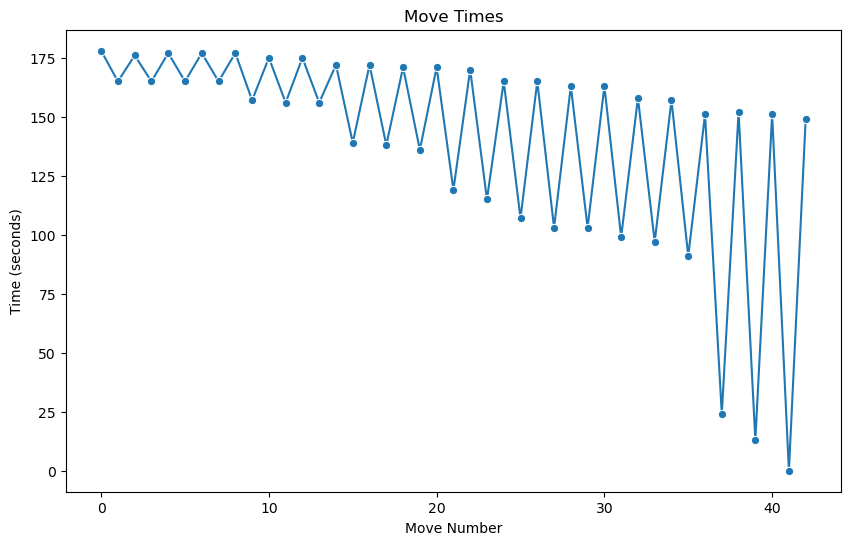

In [8]:
if features["move_times"]:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=features["move_times"], marker="o")
    plt.title("Move Times")
    plt.xlabel("Move Number")
    plt.ylabel("Time (seconds)")
    plt.show()

In [9]:
# Feature prioritization
feature_priorities = {
    "move_prediction": "high",
    "time_management": "high",
    "draw_offers_resignations": "medium"
}

# Print feature priorities
print("Feature Priorities:")
print(feature_priorities)

Feature Priorities:
{'move_prediction': 'high', 'time_management': 'high', 'draw_offers_resignations': 'medium'}


#### Identifying features for machine learning models
This is a high-level overview of potential features:

#### Move Prediction:
Sequence of moves made by each player.

#### Time Management:
Time taken for each move.
Remaining time on the clock.
Distribution of time spent across different phases of the game.

#### Draw Offers and Resignations:
Occurrence and timing of draw offers. Resignation times and conditions.

#### Prioritizing features:
Move Prediction: Critical for replicating player styles

Time Management: Important for simulating realistic play

Draw Offers and Resignations: Adds depth to game strategy understanding